In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# Define file paths
train_file = "data/raw/train.csv"
test_file = "data/raw/test.csv"

print(f"\nProcessing train file: {train_file}")
df_train = pd.read_csv(train_file)

print(f"\nProcessing test file: {test_file}")
df_test = pd.read_csv(test_file)

df_train['Dates'] = pd.to_datetime(df_train['Dates'])
df_train = df_train.set_index('Dates').sort_index()

df_test['Dates'] = pd.to_datetime(df_test['Dates'])
df_test = df_test.set_index('Dates').sort_index()



Processing train file: data/raw/train.csv

Processing test file: data/raw/test.csv


In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('display.width', 1000)

In [3]:
print("Shape df_train : ", df_train.shape)
print("Shape df_test : ", df_test.shape)

# df_train = df_train.drop("ID", axis=1)
# df_test = df_test.drop("ID", axis=1)
df_train.head()

Shape df_train :  (2811, 134)
Shape df_test :  (1206, 133)


,Features_0,Features_1,Features_2,Features_3,Features_4,Features_5,Features_6,Features_7,Features_8,Features_9,Features_10,Features_11,Features_12,Features_13,Features_14,Features_15,Features_16,Features_17,Features_18,Features_19,Features_20,Features_21,Features_22,Features_23,Features_24,Features_25,Features_26,Features_27,Features_28,Features_29,Features_30,Features_31,Features_32,Features_33,Features_34,Features_35,Features_36,Features_37,Features_38,Features_39,Features_40,Features_41,Features_42,Features_43,Features_44,Features_45,Features_46,Features_47,Features_48,Features_49,Features_50,Features_51,Features_52,Features_53,Features_54,Features_55,Features_56,Features_57,Features_58,Features_59,Features_60,Features_61,Features_62,Features_63,Features_64,Features_65,Features_66,Features_67,Features_68,Features_69,Features_70,Features_71,Features_72,Features_73,Features_74,Features_75,Features_76,Features_77,Features_78,Features_79,Features_80,Features_81,Features_82,Features_83,Features_84,Features_85,Features_86,Features_87,Features_88,Features_89,Features_90,Features_91,Features_92,Features_93,Features_94,Features_95,Features_96,Features_97,Features_98,Features_99,Features_100,Features_101,Features_102,Features_103,Features_104,Features_105,Features_106,Features_107,Features_108,Features_109,Features_110,Features_111,Features_112,Features_113,Features_114,Features_115,Features_116,Features_117,Features_118,Features_119,Features_120,Features_121,Features_122,Features_123,Features_124,Features_125,Features_126,Features_127,Features_128,Features_129,Features_130,Features_131,Features_132,ToPredict
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-11-25,-2.820409,-2.602615,-0.954643,-2.599414,-2.335286,-1.691960,-1.780899,-1.595611,-1.235825,2.043281,1.925778,1.181854,-1.160019,-1.401742,-1.601823,-1.291922,-1.507157,-1.578332,-1.121247,-1.420412,-1.467840,-1.043446,-1.256409,-1.634284,-0.916798,-1.123741,-1.342666,-1.199302,-1.333593,-1.410729,-2.149194,-2.459522,-2.421814,0.837468,0.791124,0.752671,-0.413748,-0.503927,-0.000287,-0.381685,-0.449922,-0.012908,-0.427811,-0.475571,-0.031784,-0.407115,-0.453009,0.043853,-0.348807,-0.468675,0.084671,-0.300404,-0.377763,0.114270,-0.439392,-0.496520,0.069691,-0.578591,-0.610809,-0.5759,-0.6741,-0.8331,-1.2223,-1.5023,-1.9616,1.7067,1.5783,1.1834,-2.3435,-2.3145,-2.1023,-0.62250,-0.52250,-2.96375,1.15485,-0.96445,0.89255,-1.96925,-70.7,-116.9,-119.1,-27.4,-53.3,-80.6,0.81,3.46,4.08,9.19,6.0,8.91,4.48,4.23,2.170519,2.410987,2.525242,-0.066249,-0.165977,-0.185044,-0.032773,-0.051168,-0.000812,0.037473,-0.340714,-0.437636,0.074595,-0.249995,-0.310519,0.871638,0.848983,0.821741,0.56,0.8530,0.834833,0.691060,-0.639335,-0.527028,-0.493152,-0.517682,-3.809226,-4.124744,-3.667162,-1.842550,-2.196744,-2.088513,-4.344635,-4.822917,-4.341282,-1.514242,-1.652366,-1.418750,-1.499160,-1.662834,-1.510304,-0.132452
2008-11-26,-2.866991,-2.708399,-1.150851,-2.459072,-2.327877,-1.703529,-1.692671,-1.444134,-1.157047,1.808779,1.637616,1.033184,-1.175630,-1.350093,-1.501088,-1.375944,-1.514458,-1.548540,-1.195693,-1.357093,-1.346025,-0.980527,-1.218536,-1.607523,-0.888136,-1.106568,-1.330872,-1.022576,-1.188929,-1.335690,-2.008309,-2.291634,-2.339925,0.836217,0.677543,0.754188,-0.399213,-0.490500,-0.089385,-0.370954,-0.428469,-0.131882,-0.429386,-0.468781,-0.082694,-0.393486,-0.424053,0.024080,-0.340442,-0.463238,0.064743,-0.296576,-0.375164,0.079814,-0.405161,-0.479407,0.033021,-0.554505,-0.599565,-0.7744,-0.9949,-0.8616,-1.2968,-1.7421,-1.7404,1.3336,1.1438,0.9772,-2.1630,-2.1940,-1.9182,-0.59375,-0.59000,-2.91500,0.91155,-1.01775,0.52495,-1.86625,-71.3,-108.4,-134.7,-29.5,-53.8,-80.2,0.80,3.46,4.08,9.67,6.0,6.93,6.73,4.37,2.123929,2.355087,2.546316,-0.066326,-0.167713,-0.185341,-0.030886,-0.055357,-0.001015,-0.059255,-0.331864,-0.419164,-0.023611,-0.241654,-0.287752,0.901396,0.858035,0.819608,0.70,0.855

In [4]:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())
# 0 means no null value. So there are no missing value in both train and test datasets

0
0


In [5]:
# Quantiles df_train
desc_df = df_train.describe().T
desc_df = desc_df.drop("count", axis=1)
desc_df = desc_df.drop("ToPredict", axis=0)
desc_df["unique_values"] = [df_train[col].nunique() for col in desc_df.index]
desc_df["type"] = df_train.loc[:, df_train.columns != "ID"].dtypes
desc_df.head()

,mean,std,min,25%,50%,75%,max,unique_values,type
Features_0,-0.310968,0.963092,-3.447685,-0.890150,-0.192513,0.363837,1.980559,2804,float64
Features_1,-0.349218,0.981390,-3.525744,-0.841504,-0.217366,0.343254,1.830231,2799,float64
Features_2,-0.516309,0.945996,-3.056214,-1.097599,-0.367444,0.135735,1.742020,2805,float64
Features_3,-0.057931,0.983660,-3.045759,-0.803502,-0.082431,0.724527,2.378744,2804,float64
Features_4,-0.070508,1.010675,-3.107462,-0.796875,-0.094663,0.666607,2.298437,2799,float64


Features_109 could be categorical : only 9 unique values. The rest are continuous

Features_109 has 209 distinct values in df_test, so not categorical in the end

In [6]:
# Quantiles df_test
desc_df = df_test.describe().T
desc_df = desc_df.drop("count", axis=1)
desc_df["unique_values"] = [df_test[col].nunique() for col in desc_df.index]
desc_df["type"] = df_test.loc[:, df_test.columns != "ID"].dtypes
desc_df.head()

,mean,std,min,25%,50%,75%,max,unique_values,type
Features_0,0.048712,1.126317,-2.578693,-0.930578,0.137222,0.961323,2.272501,1204,float64
Features_1,0.048216,1.144716,-2.377965,-0.858672,0.117521,0.911662,2.519630,1199,float64
Features_2,0.015182,1.255924,-2.286876,-1.097288,-0.361158,1.276169,2.547450,1202,float64
Features_3,0.162364,1.153858,-2.825241,-0.673902,0.257675,0.958546,2.902980,1204,float64
Features_4,0.163566,1.155650,-2.407183,-0.776245,0.281106,0.953908,2.733422,1199,float64


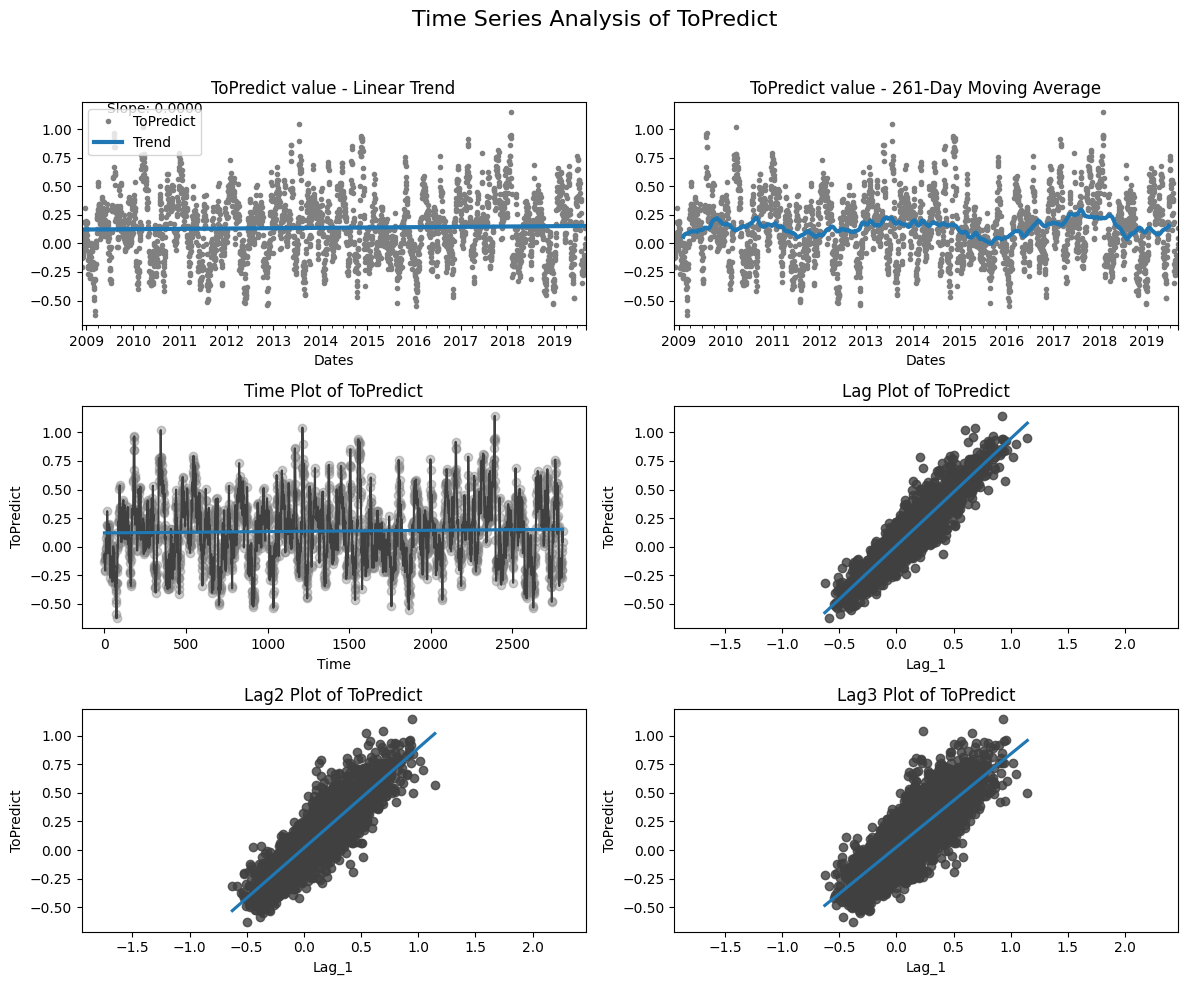

In [7]:
# Create a combined visualization of all time series plots
from sklearn.linear_model import LinearRegression


fig = plt.figure(figsize=(12, 10))

# 1. Linear Trend Plot
ax1 = plt.subplot(3, 2, 1)
df_toPredict = df_train["ToPredict"]
df_copy = df_train.copy()
df_copy['Time'] = np.arange(len(df_copy.index))
X = df_copy.loc[:, ['Time']]
y = df_train.loc[:, 'ToPredict']
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
plt.annotate(f'Slope: {model.coef_[0]:.4f}', xy=(0.05, 0.95), xycoords='axes fraction')
y_pred = pd.Series(model.predict(X), index=X.index)
df_toPredict.plot(style=".", color="0.5", ax=ax1)
y_pred.plot(ax=ax1, linewidth=3, label="Trend")
ax1.set_title("ToPredict value - Linear Trend")
ax1.legend()

# 2. Moving Average Plot
ax2 = plt.subplot(3, 2, 2)
moving_average = df_toPredict.rolling(
    window=261,       # 261-day window
    center=True,      # puts the average at the center of the window
    min_periods=183,  # choose about half the window size
).mean()
df_toPredict.plot(style=".", color="0.5", ax=ax2)
moving_average.plot(ax=ax2, linewidth=3, legend=False)
ax2.set_title("ToPredict value - 261-Day Moving Average")

# 3. Time Plot with Regression
ax3 = plt.subplot(3, 2, 3)
ax3.plot('Time', 'ToPredict', data=df_copy, color='0.25')
sns.regplot(x='Time', y='ToPredict', data=df_copy, ci=None, 
            scatter_kws=dict(color='0.5', alpha=0.4), ax=ax3)
ax3.set_title('Time Plot of ToPredict')

# 4. Lag Plot
ax4 = plt.subplot(3, 2, 4)
df_copy_lag = df_train.copy()
df_copy_lag['Lag_1'] = df_copy_lag['ToPredict'].shift(1)
sns.regplot(x='Lag_1', y='ToPredict', data=df_copy_lag, ci=None, 
            scatter_kws=dict(color='0.25'), ax=ax4)
ax4.set_title('Lag Plot of ToPredict')
ax4.axis('equal')  # This maintains the equal aspect ratio

# 5. Lag 2 Plot
ax4 = plt.subplot(3, 2, 5)
df_copy_lag = df_train.copy()
df_copy_lag['Lag_1'] = df_copy_lag['ToPredict'].shift(2)
sns.regplot(x='Lag_1', y='ToPredict', data=df_copy_lag, ci=None, 
            scatter_kws=dict(color='0.25'), ax=ax4)
ax4.set_title('Lag2 Plot of ToPredict')
ax4.axis('equal')  # This maintains the equal aspect ratio

# 6. Lag 3 Plot
ax4 = plt.subplot(3, 2, 6)
df_copy_lag = df_train.copy()
df_copy_lag['Lag_1'] = df_copy_lag['ToPredict'].shift(3)
sns.regplot(x='Lag_1', y='ToPredict', data=df_copy_lag, ci=None, 
            scatter_kws=dict(color='0.25'), ax=ax4)
ax4.set_title('Lag3 Plot of ToPredict')
ax4.axis('equal')  # This maintains the equal aspect ratio


# Add a main title and adjust layout
plt.suptitle('Time Series Analysis of ToPredict', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust to make room for the main title
plt.show()

In [8]:
y_trend = y_pred.copy()

* Trend and Time Plot: completely flat (if not y-intersept)
* Moving average: 261 days since it is the span of one year's of observations. 
* Lag Plots: correlations with the past


### Periodogram to see how many Fourrier transforms we'll use

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

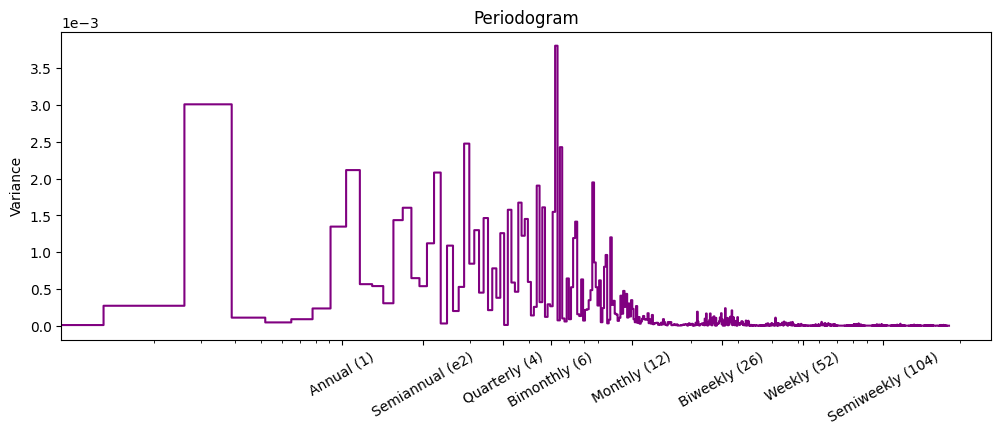

In [9]:
def plot_periodogram(ts, detrend='linear', ax=None):
    from scipy.signal import periodogram
    fs = pd.Timedelta("365D") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots(figsize=(12, 4))
    # fig.set_figwidth(12)
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (e2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


plot_periodogram(df_train["ToPredict"])

### Seasonal forecast

* The largest peaks are around the "Quarterly (4)" and "Bimonthly (6)" frequencies.
* There is little energy at the "Annual (1)" and "Semiannual (2)" frequencies, but some at "Quarterly (4)" and "Bimonthly (6)".
* The spectrum then decays as frequency increases, with smaller peaks at higher frequencies.

A good starting point is to set order=6 in CalendarFourier(freq="A", order=6).


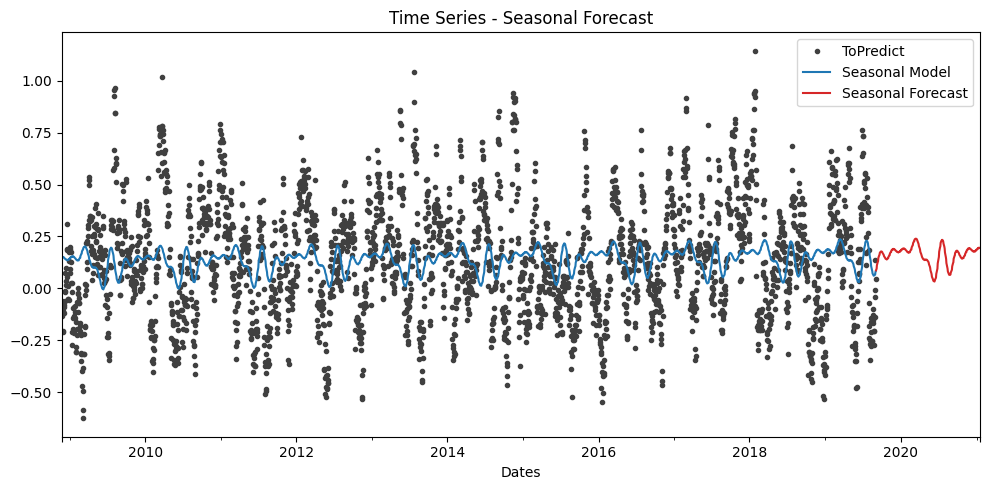

In [10]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Create a copy of the dataframe to avoid modifying the original
df = df_train.copy()

# 1. Properly convert 'Dates' to datetime and set as index
# df['Dates'] = pd.to_datetime(df['Dates'])
# df = df.set_index('Dates').sort_index()

# 2. Create the fourier terms for annual seasonality
fourier = CalendarFourier(freq="YE", order=6)  # 4 or 6 sin/cos pairs for Quarterly and Bimonthly seasonality

# 3. Create the deterministic process with the properly formatted index
dp = DeterministicProcess(
    index=df.index,
    constant=True,               # dummy feature for bias (y-intercept)
    order=1,                     # trend (order 1 means linear)
    seasonal=True,               # weekly seasonality (indicators)
    additional_terms=[fourier],  # annual seasonality (fourier)
    drop=True,                   # drop terms to avoid collinearity              
)

# 4. Generate the features for the dates in your index
X = dp.in_sample()

# 5. Your target variable
y = df["ToPredict"]

# 6. Fit the linear regression model
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# 7. Make predictions on the training data
y_pred = pd.Series(model.predict(X), index=y.index)

# 8. Use a date-based approach for the forecast index
last_date = df.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=360, freq='B')
X_fore = dp.out_of_sample(forecast_index=forecast_dates, steps=360)

# 9. Make predictions for future dates
y_fore = pd.Series(model.predict(X_fore), index=X_fore.index)

# 10. Plot the results
plt.figure(figsize=(10, 5))
ax = y.plot(color='0.25', style='.', title="Time Series - Seasonal Forecast")
ax = y_pred.plot(ax=ax, label="Seasonal Model")
ax = y_fore.plot(ax=ax, label="Seasonal Forecast", color='C3')
ax.legend()
plt.tight_layout()
plt.show()

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf


def lagplot(x, y=None, lag=1, standardize=False, ax=None, **kwargs):
    from matplotlib.offsetbox import AnchoredText
    x_ = x.shift(lag)
    if standardize:
        x_ = (x_ - x_.mean()) / x_.std()
    if y is not None:
        y_ = (y - y.mean()) / y.std() if standardize else y
    else:
        y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax


def plot_lags(x, y=None, lags=6, nrows=1, lagplot_kwargs={}, **kwargs):
    import math
    kwargs.setdefault('nrows', nrows)
    kwargs.setdefault('ncols', math.ceil(lags / nrows))
    kwargs.setdefault('figsize', (kwargs['ncols'] * 2, nrows * 2 + 0.5))
    fig, axs = plt.subplots(sharex=True, sharey=True, squeeze=False, **kwargs)
    for ax, k in zip(fig.get_axes(), range(kwargs['nrows'] * kwargs['ncols'])):
        if k + 1 <= lags:
            ax = lagplot(x, y, lag=k + 1, ax=ax, **lagplot_kwargs)
            ax.set_title(f"Lag {k + 1}", fontdict=dict(fontsize=14))
            ax.set(xlabel="", ylabel="")
        else:
            ax.axis('off')
    plt.setp(axs[-1, :], xlabel=x.name)
    plt.setp(axs[:, 0], ylabel=y.name if y is not None else x.name)
    fig.tight_layout(w_pad=0.1, h_pad=0.1)
    return fig


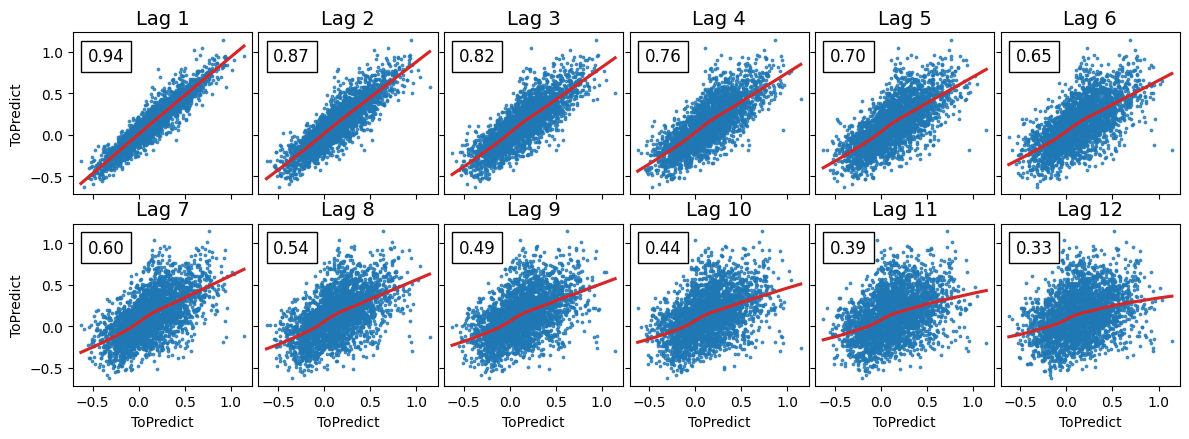

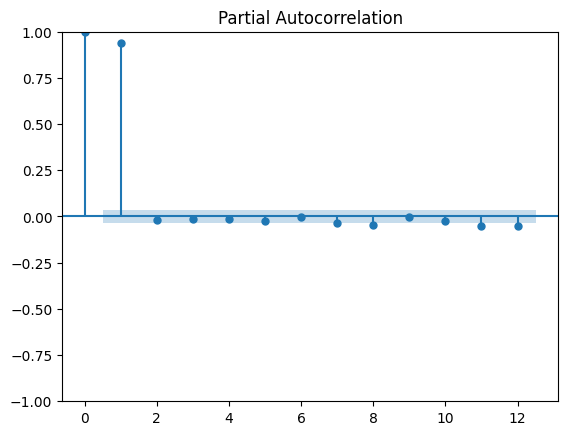

In [12]:
_ = plot_lags(df_train.ToPredict, lags=12, nrows=2)
_ = plot_pacf(df_train.ToPredict, lags=12)

Relationship of ToPredict to its lag is mostly lineat, and lag 1 and 2 caputure all the dependence

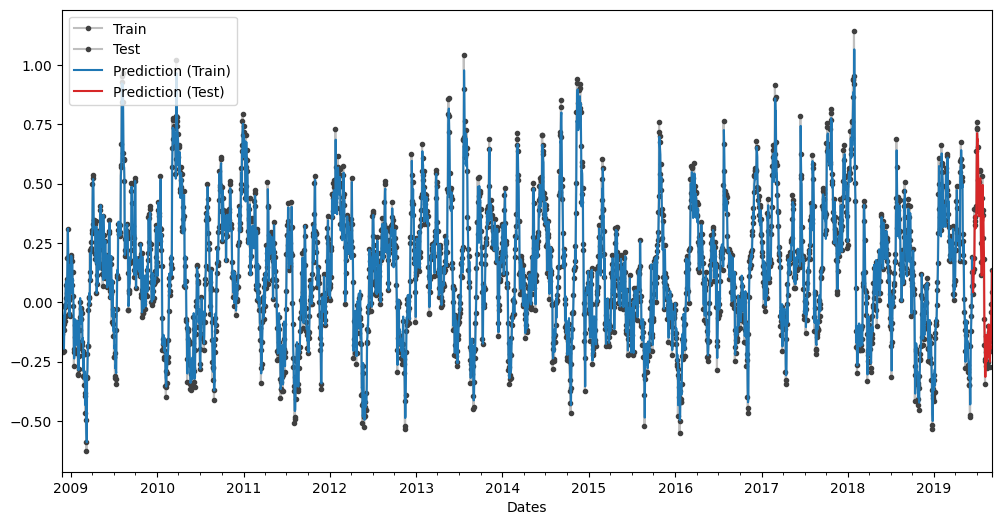

In [13]:
# model and prediction simply on df_train

from sklearn.model_selection import train_test_split

y = df_train.ToPredict.copy()

def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)

search_terms = ["Features_47",	"Features_50",	"Features_53",	"Features_56", "Features_84",	"Features_88",	"Features_89",	"Features_90",	"Features_91"]

X0 = make_lags(df_train[search_terms], lags=2)
X0 = X0.fillna(0.0)

X0.columns = [' '.join(col).strip() for col in X0.columns.values]

# Create four lags for the target, as before
X1 = make_lags(df_train['ToPredict'], lags=1)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = pd.Series(model.predict(X_train), index=y_train.index)
y_fore = pd.Series(model.predict(X_test), index=y_test.index)

# ax = y_test.plot(**plot_params)
# _ = y_fore.plot(ax=ax, color='C3')

# Plot the results
plt.figure(figsize=(12, 6))  # Adjust the figure size here
ax = y_train.plot(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", label="Train")
ax = y_test.plot(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", label="Test")
ax = y_pred.plot(ax=ax, label="Prediction (Train)", color="C0")
_ = y_fore.plot(ax=ax, label="Prediction (Test)", color="C3")

# Add legend and show the plot
ax.legend()
plt.show()

Predictions on the test dataframe:
Dates
2019-09-04    0.053925
2019-09-05   -0.001008
2019-09-06    0.015025
2019-09-09   -0.004996
2019-09-10    0.004017
                ...   
2024-04-11    0.022089
2024-04-12    0.013459
2024-04-15    0.023201
2024-04-16    0.025342
2024-04-17    0.017423
Length: 1206, dtype: float64


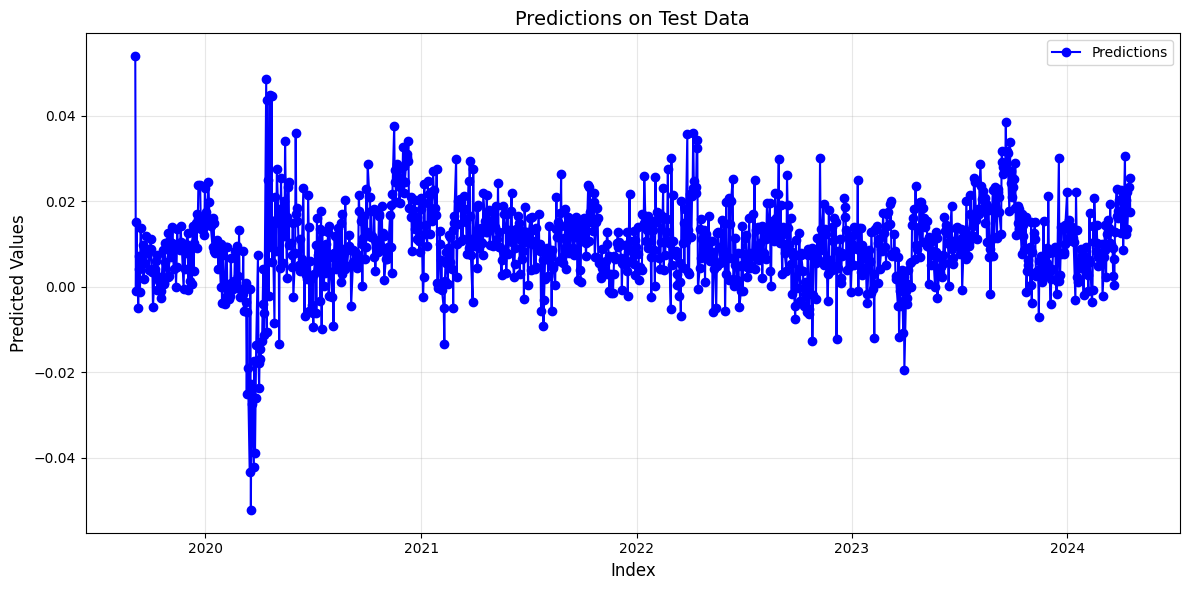

In [14]:
# model and prediction on df_train and df_test - help Copilot

# Combine df_train and df_test to ensure continuity for lag features
combined = pd.concat([df_train, df_test], axis=0)

# Create lag features for the combined dataset
lags_target = 2  # Number of lags for the target variable
lags_features = 2  # Number of lags for the selected features

# Create lag features for the target variable
lagged_target = make_lags(combined['ToPredict'], lags=lags_target)

# Create lag features for the selected features
search_terms = ["Features_47", "Features_50", "Features_53", "Features_56", 
                "Features_84", "Features_88", "Features_89", "Features_90", "Features_91"]
lagged_features = make_lags(combined[search_terms], lags=lags_features)

# Combine all lagged features
combined_lags = pd.concat([lagged_target, lagged_features], axis=1).fillna(0.0)

# Convert column names to strings
combined_lags.columns = combined_lags.columns.map(str)

# Split the lagged features back into train and test sets
X_train = combined_lags.loc[df_train.index]
X_test = combined_lags.loc[df_test.index]

# Ensure y_train is aligned with X_train
y_train = df_train["ToPredict"]

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_test_predictions = pd.Series(model.predict(X_test), index=df_test.index)

# Display the predictions
print("Predictions on the test dataframe:")
print(y_test_predictions)

# Optionally, plot the predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_predictions.index, y_test_predictions, label="Predictions", color="blue", linestyle="-", marker="o")
plt.title("Predictions on Test Data", fontsize=14)
plt.xlabel("Index", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

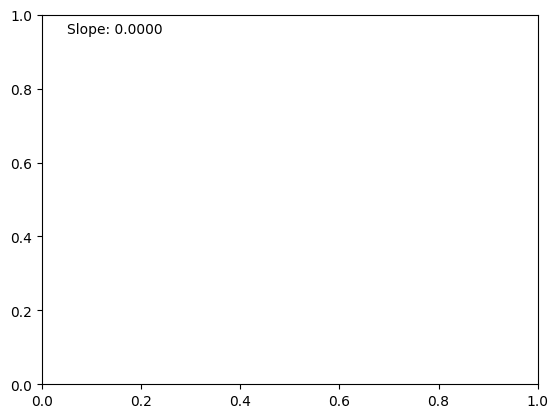

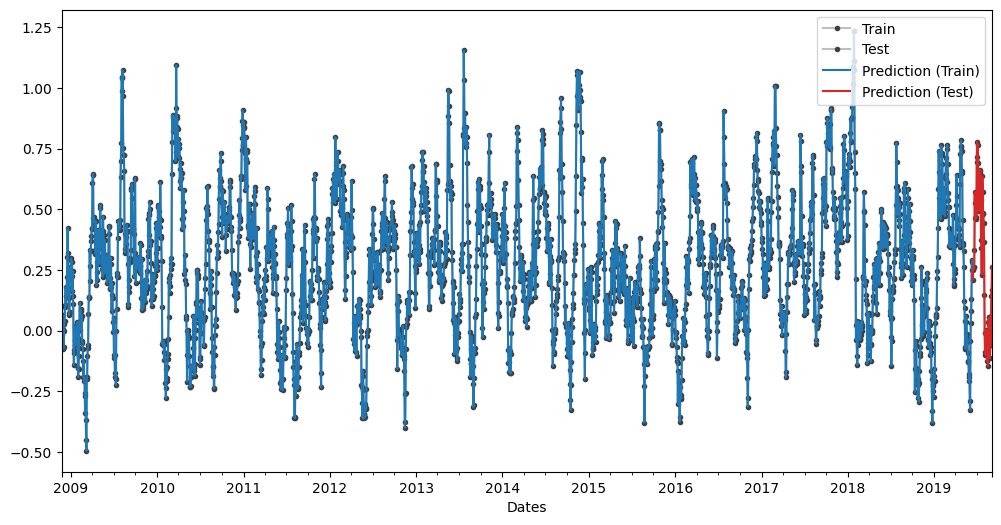

In [15]:
# model and prediction simply on df_train

from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

y = df_train.ToPredict.copy()

def make_lags(ts, lags):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(1, lags + 1)
        },
        axis=1)

search_terms = ["Features_47",	"Features_50",	"Features_53",	"Features_56", "Features_84",	"Features_88",	"Features_89",	"Features_90",	"Features_91"]

X0 = make_lags(df_train[search_terms], lags=1)
X0 = X0.fillna(0.0)

X0.columns = [' '.join(col).strip() for col in X0.columns.values]

# Create four lags for the target, as before
X1 = make_lags(df_train['ToPredict'], lags=2)

# Combine to create the training data
X = pd.concat([X0, X1], axis=1).fillna(0.0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=60, shuffle=False)

df_toPredict = df_train["ToPredict"]
df_copy = df_train.copy()
df_copy['Time'] = np.arange(len(df_copy.index))
X = df_copy.loc[:, ['Time']]
y = df_train.loc[:, 'ToPredict']
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
plt.annotate(f'Slope: {model.coef_[0]:.4f}', xy=(0.05, 0.95), xycoords='axes fraction')
y_pred = pd.Series(model.predict(X), index=X.index)
df_toPredict.plot(style=".", color="0.5", ax=ax1)

y_resid = y_train - y_trend[:2751]
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Add the predicted residuals onto the predicted trends
y_fit_boosted = xgb.predict(X_train) + y_trend[:2751]
y_pred_boosted = xgb.predict(X_test) + y_trend[2751:]

# ax = y_test.plot(**plot_params)
# _ = y_fore.plot(ax=ax, color='C3')

# Plot the results
plt.figure(figsize=(12, 6))  # Adjust the figure size here
ax = y_fit_boosted.plot(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", label="Train")
ax = y_pred_boosted.plot(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", label="Test")
ax = y_fit_boosted.plot(ax=ax, label="Prediction (Train)", color="C0")
_ = y_pred_boosted.plot(ax=ax, label="Prediction (Test)", color="C3")

# Add legend and show the plot
ax.legend()
plt.show()

In [16]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

simplefilter("ignore")

# Set Matplotlib defaults
# plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
%config InlineBackend.figure_format = 'retina'


def plot_multistep(y, every=1, ax=None, palette_kwargs=None):
    palette_kwargs_ = dict(palette='husl', n_colors=16, desat=None)
    if palette_kwargs is not None:
        palette_kwargs_.update(palette_kwargs)
    palette = sns.color_palette(**palette_kwargs_)
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_prop_cycle(plt.cycler('color', palette))
    for date, preds in y[::every].iterrows():
        preds.index = pd.period_range(start=date, periods=len(preds))
        preds.plot(ax=ax)
    return ax


# data_dir = Path("../input/ts-course-data")
flu_trends = pd.read_csv("flu-trends.csv")
flu_trends.set_index(
    pd.PeriodIndex(flu_trends.Week, freq="W"),
    inplace=True,
)
flu_trends.drop("Week", axis=1, inplace=True)

flu_trends.head()

,AInfluenza,AcuteBronchitis,BodyTemperature,BraunThermoscan,BreakAFever,Bronchitis,ChestCold,ColdAndFlu,ColdOrFlu,ColdVersusFlu,ColdVsFlu,ContagiousFlu,CoughFever,CureFlu,CureTheFlu,DangerousFever,DoIHaveTheFlu,EarThermometer,EarlyFluSymptoms,Expectorant,ExposedToFlu,FeverCough,FeverFlu,FeverReducer,FightTheFlu,FluAndCold,FluAndFever,FluCare,FluChildren,FluComplications,FluContagiousPeriod,FluContagious,FluCough,FluDuration,FluFever,FluGerms,FluHeadache,FluHowLong,FluInChildren,FluIncubationPeriod,FluIncubation,FluLasts,FluLength,FluMedicine,FluOrCold,FluRecovery,FluRelief,FluRemedies,FluRemedy,FluReport,FluReports,FluSymptoms,FluTest,FluTreatment,FluTreatments,FluVersusCold,FluVsCold,GetOverTheFlu,GetRidOfTheFlu,HavingTheFlu,HighFever,HowLongContagious,HowLongDoesFluLast,HowLongDoesTheFluLast,HowLongFlu,HowLongIsFluContagious,HowLongIsTheFluContagious,HowLongIsTheFlu,HowToGetRidOfTheFlu,HowToTreatFlu,HowToTreatTheFlu,HumanTemperature,IHaveTheFlu,IncubationPeriodForFlu,IncubationPeriodForTheFlu,InfluenzaAAndB,InfluenzaA,InfluenzaContagious,InfluenzaIncubationPeriod,InfluenzaIncubation,InfluenzaSymptoms,InfluenzaTreatment,InfluenzaTypeA,IsFluContagious,LowBody,MedicineForFlu,MedicineForTheFlu,NormalBodyTemperature,NormalBody,Oscillococcinum,OverTheCounterFluMedicine,OverTheCounterFlu,PainfulCough,Pneumonia,RapidFlu,ReduceAFever,ReduceFever,RemediesForFlu,RemediesForTheFlu,RespiratoryFlu,Robitussin,SignsOfFlu,SignsOfTheFlu,SinusInfections,Sinus,StrepThroat,Strep,SymptomsOfBronchitis,SymptomsOfFlu,SymptomsOfInfluenza,SymptomsOfPneumonia,SymptomsOfTheFlu,TakingTemperature,Tessalon,TheFluVirus,TheFlu,Thermoscan,TreatFlu,TreatTheFlu,TreatingFlu,TreatingTheFlu,TreatmentForFlu,TreatmentForTheFlu,Tussin,Tussionex,TypeAInfluenza,UpperRespiratory,WalkingPneumonia,WhatToDoIfYouHaveTheFlu,FluVisits
Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-06-29/2009-07-05,36,20,43,27,11,22,16,7,3,8,4,5,15,3,5,18,2,29,7,36,21,15,15,19,13,7,22,9,5,3,8,5,16,12,15,10,15,6,4,7,8,10,9,7,3,13,16,9,12,4,2,6,6,8,6,8,4,5,9,7,43,11,8,3,6,3,3,4,10,12,13,37,5,5,6,7,36,6,12,7,8,13,30,3,52,4,8,33,45,7,14,11,10,33,8,27,19,6,6,9,22,6,4,27,44,36,43,15,6,8,19,4,26,23,3,3,34,6,5,4,16,6,13,25,34,30,25,24,15,180
2009-07-06/2009-07-12,25,19,40,31,10,21,11,6,8,8,7,6,13,3,1,19,5,35,12,21,16,13,15,18,7,6,20,7,4,4,7,6,14,17,15,13,16,7,4,8,8,10,6,9,8,8,10,7,7,3,3,6,5,7,7,8,7,4,7,5,38,9,7,4,7,3,2,5,5,18,7,46,7,6,10,8,25,5,7,6,11,15,27,4,53,6,5,26,36,5,6,7,19,33,5,23,14,3,6,6,21,6,6,26,42,34,40,12,5,7,18,4,23,23,4,3,25,12,9,13,16,7,8,27,32,27,28,29,9,115
2009-07-13/2009-07-19,24,30,45,20,12,20,20,6,6,8,4,6,11,3,2,17,8,29,9,24,7,11,13,13,7,6,20,9,5,7,9,6,13,16,13,5,14,7,5,6,6,10,7,7,6,10,9,6,6,3,3,7,7,7,6,8,4,9,6,9,38,12,7,4,7,3,2,4,4,10,9,32,8,5,5,8,24,2,10,8,9,11,25,5,56,8,7,34,45,9,6,7,19,32,11,15,17,7,6,13,19,5,7,28,43,32,39,15,6,6,14,4,30,18,4,3,23,8,11,12,16,6,9,24,28,25,25,25,9,132
2009-07-20/2009-07-26,23,19,40,15,10,19,12,7,10,15,3,5,14,3,2,14,2,18,9,18,17,14,12,18,4,7,14,8,5,5,8,5,13,7,12,14,16,6,3,8,8,10,4,8,10,14,7,7,9,5,2,6,8,7,5,15,3,9,6,5,39,9,7,5,6,2,3,5,6,8,7,28,4,7,6,8,23,5,10,10,7,10,26,2,53,10,6,30,40,8,8,6,12,32,20,23,12,7,11,6,18,6,4,27,44,30,35,15,5,6,16,4,22,18,4,3,13,5,6,7,8,5,12,21,26,26,29,24,13,109
2009-07-27/2009-08-02,27,21,44,20,11,19,17,8,10,15,6,5,11,3,5,17,5,28,12,30,13,11,15,14,6,8,23,11,7,7,9,5,14,15,15,16,23,7,6,7,8,9,5,10,10,16,10,8,8,3,4,7,7,8,9,15,6,7,6,5,40,9,6,4,7,4,2,4,4,9,5,38,8,7,4,11,27,2,8,8,7,16,21,4,49,5,5,40,47,10,9,8,9,34,17,19,14,8,7,10,20,7,6,28,43,30,36,12,6,6,14,5,33,17,6,4,23,8,10,6,8,8,12,33,29,21,27,30,9,120


In [17]:
df_train

,Features_0,Features_1,Features_2,Features_3,Features_4,Features_5,Features_6,Features_7,Features_8,Features_9,Features_10,Features_11,Features_12,Features_13,Features_14,Features_15,Features_16,Features_17,Features_18,Features_19,Features_20,Features_21,Features_22,Features_23,Features_24,Features_25,Features_26,Features_27,Features_28,Features_29,Features_30,Features_31,Features_32,Features_33,Features_34,Features_35,Features_36,Features_37,Features_38,Features_39,Features_40,Features_41,Features_42,Features_43,Features_44,Features_45,Features_46,Features_47,Features_48,Features_49,Features_50,Features_51,Features_52,Features_53,Features_54,Features_55,Features_56,Features_57,Features_58,Features_59,Features_60,Features_61,Features_62,Features_63,Features_64,Features_65,Features_66,Features_67,Features_68,Features_69,Features_70,Features_71,Features_72,Features_73,Features_74,Features_75,Features_76,Features_77,Features_78,Features_79,Features_80,Features_81,Features_82,Features_83,Features_84,Features_85,Features_86,Features_87,Features_88,Features_89,Features_90,Features_91,Features_92,Features_93,Features_94,Features_95,Features_96,Features_97,Features_98,Features_99,Features_100,Features_101,Features_102,Features_103,Features_104,Features_105,Features_106,Features_107,Features_108,Features_109,Features_110,Features_111,Features_112,Features_113,Features_114,Features_115,Features_116,Features_117,Features_118,Features_119,Features_120,Features_121,Features_122,Features_123,Features_124,Features_125,Features_126,Features_127,Features_128,Features_129,Features_130,Features_131,Features_132,ToPredict
Dates,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-11-25,-2.820409,-2.602615,-0.954643,-2.599414,-2.335286,-1.691960,-1.780899,-1.595611,-1.235825,2.043281,1.925778,1.181854,-1.160019,-1.401742,-1.601823,-1.291922,-1.507157,-1.578332,-1.121247,-1.420412,-1.467840,-1.043446,-1.256409,-1.634284,-0.916798,-1.123741,-1.342666,-1.199302,-1.333593,-1.410729,-2.149194,-2.459522,-2.421814,0.837468,0.791124,0.752671,-0.413748,-0.503927,-0.000287,-0.381685,-0.449922,-0.012908,-0.427811,-0.475571,-0.031784,-0.407115,-0.453009,0.043853,-0.348807,-0.468675,0.084671,-0.300404,-0.377763,0.114270,-0.439392,-0.496520,0.069691,-0.578591,-0.610809,-0.5759,-0.6741,-0.8331,-1.2223,-1.5023,-1.9616,1.7067,1.5783,1.1834,-2.3435,-2.3145,-2.1023,-0.62250,-0.52250,-2.96375,1.15485,-0.96445,0.89255,-1.96925,-70.7,-116.9,-119.1,-27.4,-53.3,-80.6,0.81,3.46,4.08,9.19,6.0,8.91,4.48,4.23,2.170519,2.410987,2.525242,-0.066249,-0.165977,-0.185044,-0.032773,-0.051168,-0.000812,0.037473,-0.340714,-0.437636,0.074595,-0.249995,-0.310519,0.871638,0.848983,0.821741,0.56,0.8530,0.834833,0.691060,-0.639335,-0.527028,-0.493152,-0.517682,-3.809226,-4.124744,-3.667162,-1.842550,-2.196744,-2.088513,-4.344635,-4.822917,-4.341282,-1.514242,-1.652366,-1.418750,-1.499160,-1.662834,-1.510304,-0.132452
2008-11-26,-2.866991,-2.708399,-1.150851,-2.459072,-2.327877,-1.703529,-1.692671,-1.444134,-1.157047,1.808779,1.637616,1.033184,-1.175630,-1.350093,-1.501088,-1.375944,-1.514458,-1.548540,-1.195693,-1.357093,-1.346025,-0.980527,-1.218536,-1.607523,-0.888136,-1.106568,-1.330872,-1.022576,-1.188929,-1.335690,-2.008309,-2.291634,-2.339925,0.836217,0.677543,0.754188,-0.399213,-0.490500,-0.089385,-0.370954,-0.428469,-0.131882,-0.429386,-0.468781,-0.082694,-0.393486,-0.424053,0.024080,-0.340442,-0.463238,0.064743,-0.296576,-0.375164,0.079814,-0.405161,-0.479407,0.033021,-0.554505,-0.599565,-0.7744,-0.9949,-0.8616,-1.2968,-1.7421,-1.7404,1.3336,1.1438,0.9772,-2.1630,-2.1940,-1.9182,-0.59375,-0.59000,-2.91500,0.91155,-1.01775,0.52495,-1.86625,-71.3,-108.4,-134.7,-29.5,-53.8,-80.2,0.80,3.46,4.08,9.67,6.0,6.93,6.73,4.37,2.123929,2.355087,2.546316,-0.066326,-0.167713,-0.185341,-0.030886,-0.055357,-0.001015,-0.059255,-0.331864,-0.419164,-0.023611,-0.241654,-0.287752,0.901396,0.858035,0.819608,0.70,0.855

In [25]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)


# Four weeks of lag features
y = flu_trends.FluVisits.copy()
X = make_lags(y, lags=4).fillna(0.0)
# print("X with lag : \n", X.head())
# print("X shape : " , X.shape)
# print("y with lag : \n", y.head())
# print("y shape : " , y.shape)

def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)

# Eight-week forecast - values 8 steps AFTER
y = make_multistep_target(y, steps=8).dropna()
# print("\ny with multistep target before align : \n", y.head())
# print("y shape : " , y.shape)

# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)

# print("\nX with multistep target after align : \n", X.head())
# print("X with multistep target after align shape : \n", X.shape)
# print("y with multistep target after align : ", y.head())
# print("y shape : " , y.shape)


Train RMSE: 389.12
Test RMSE: 582.33


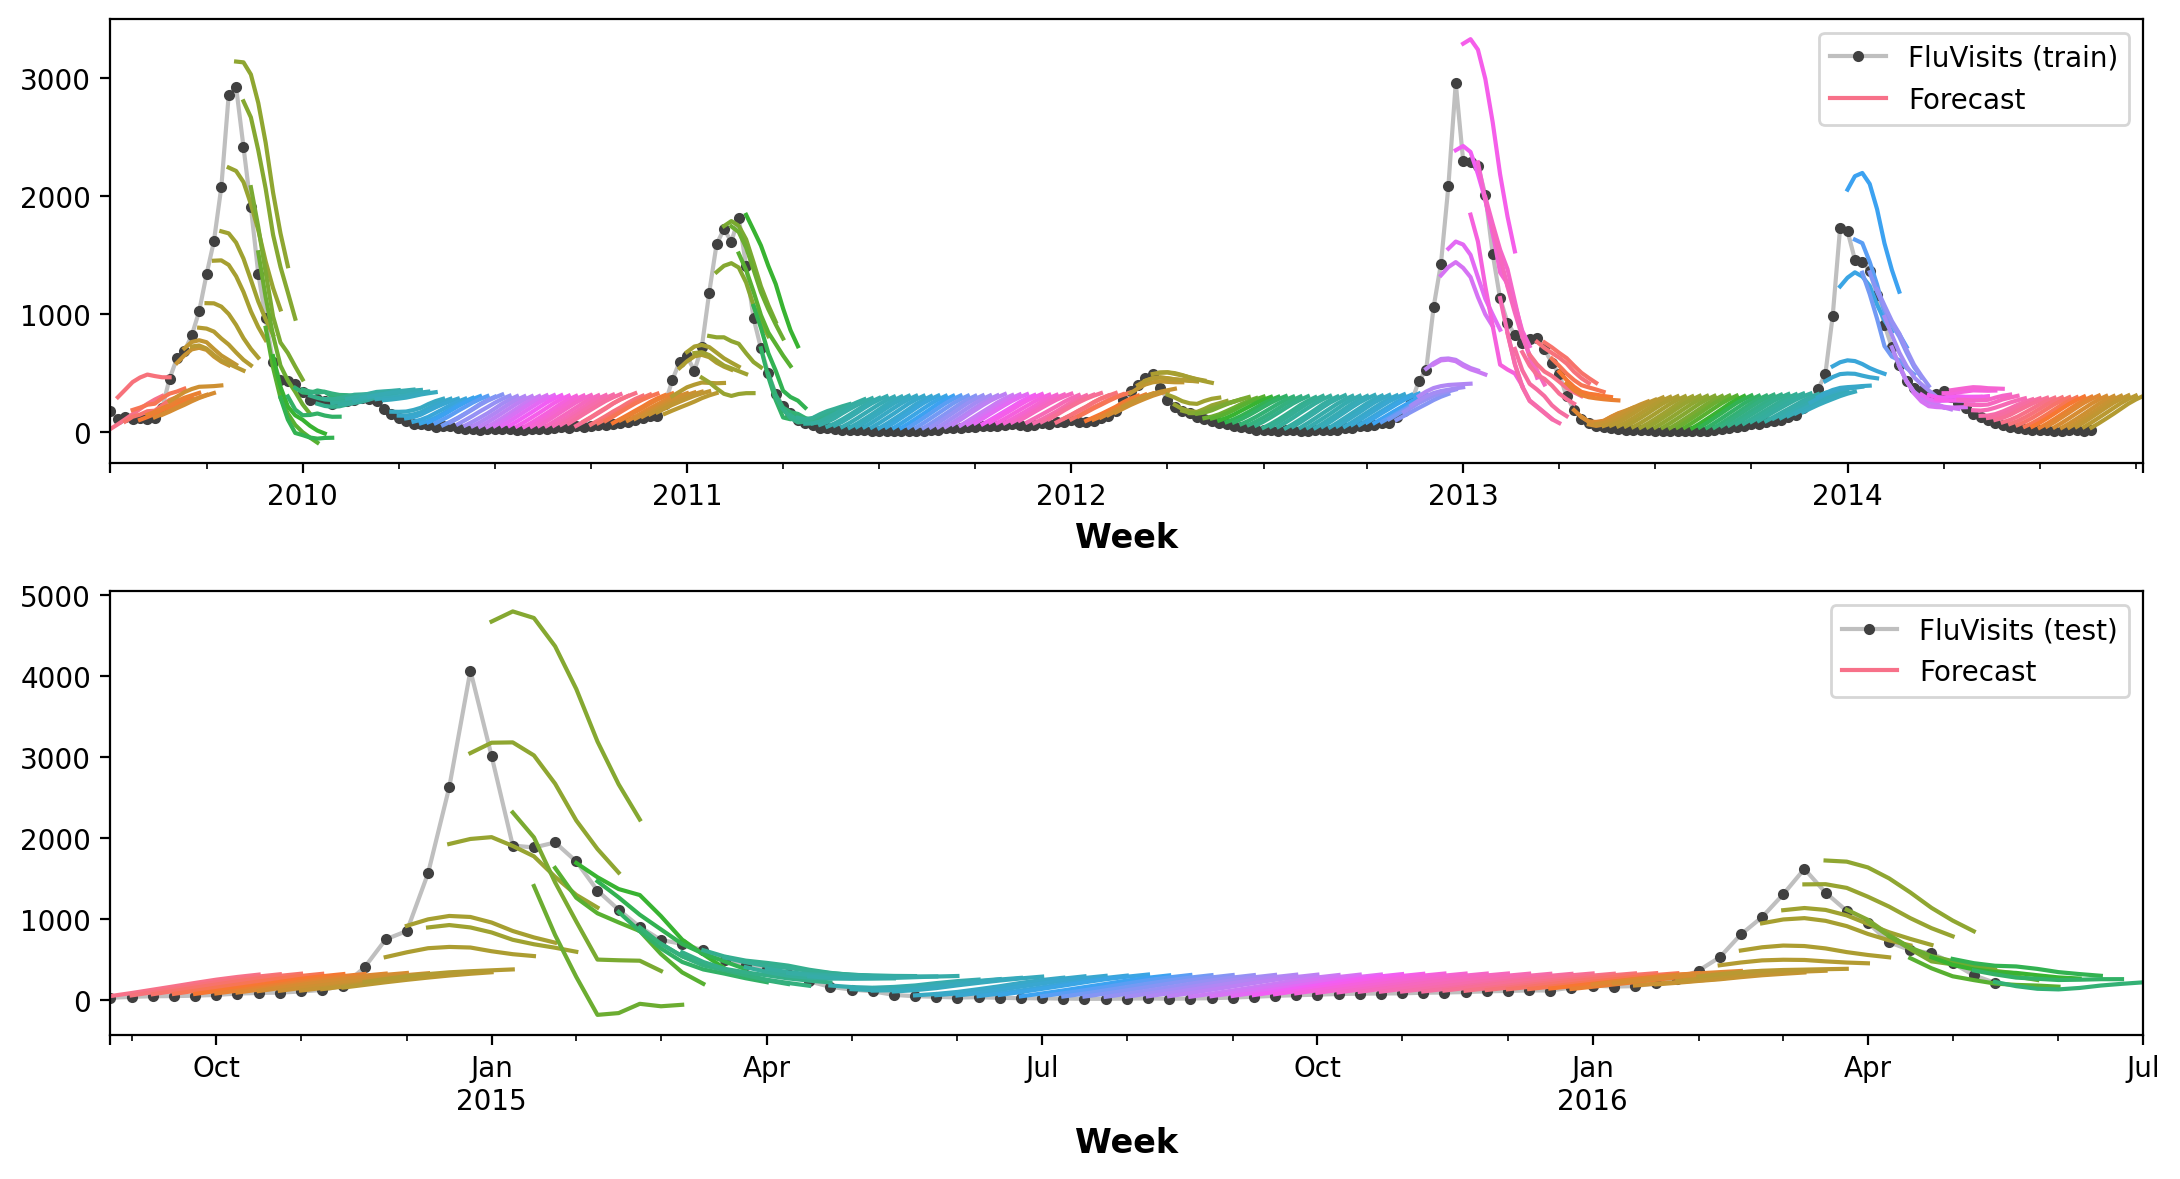

In [19]:
# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)


train_rmse = root_mean_squared_error(y_train, y_fit)
test_rmse = root_mean_squared_error(y_test, y_pred)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

Train RMSE: 1.19
Test RMSE: 494.52


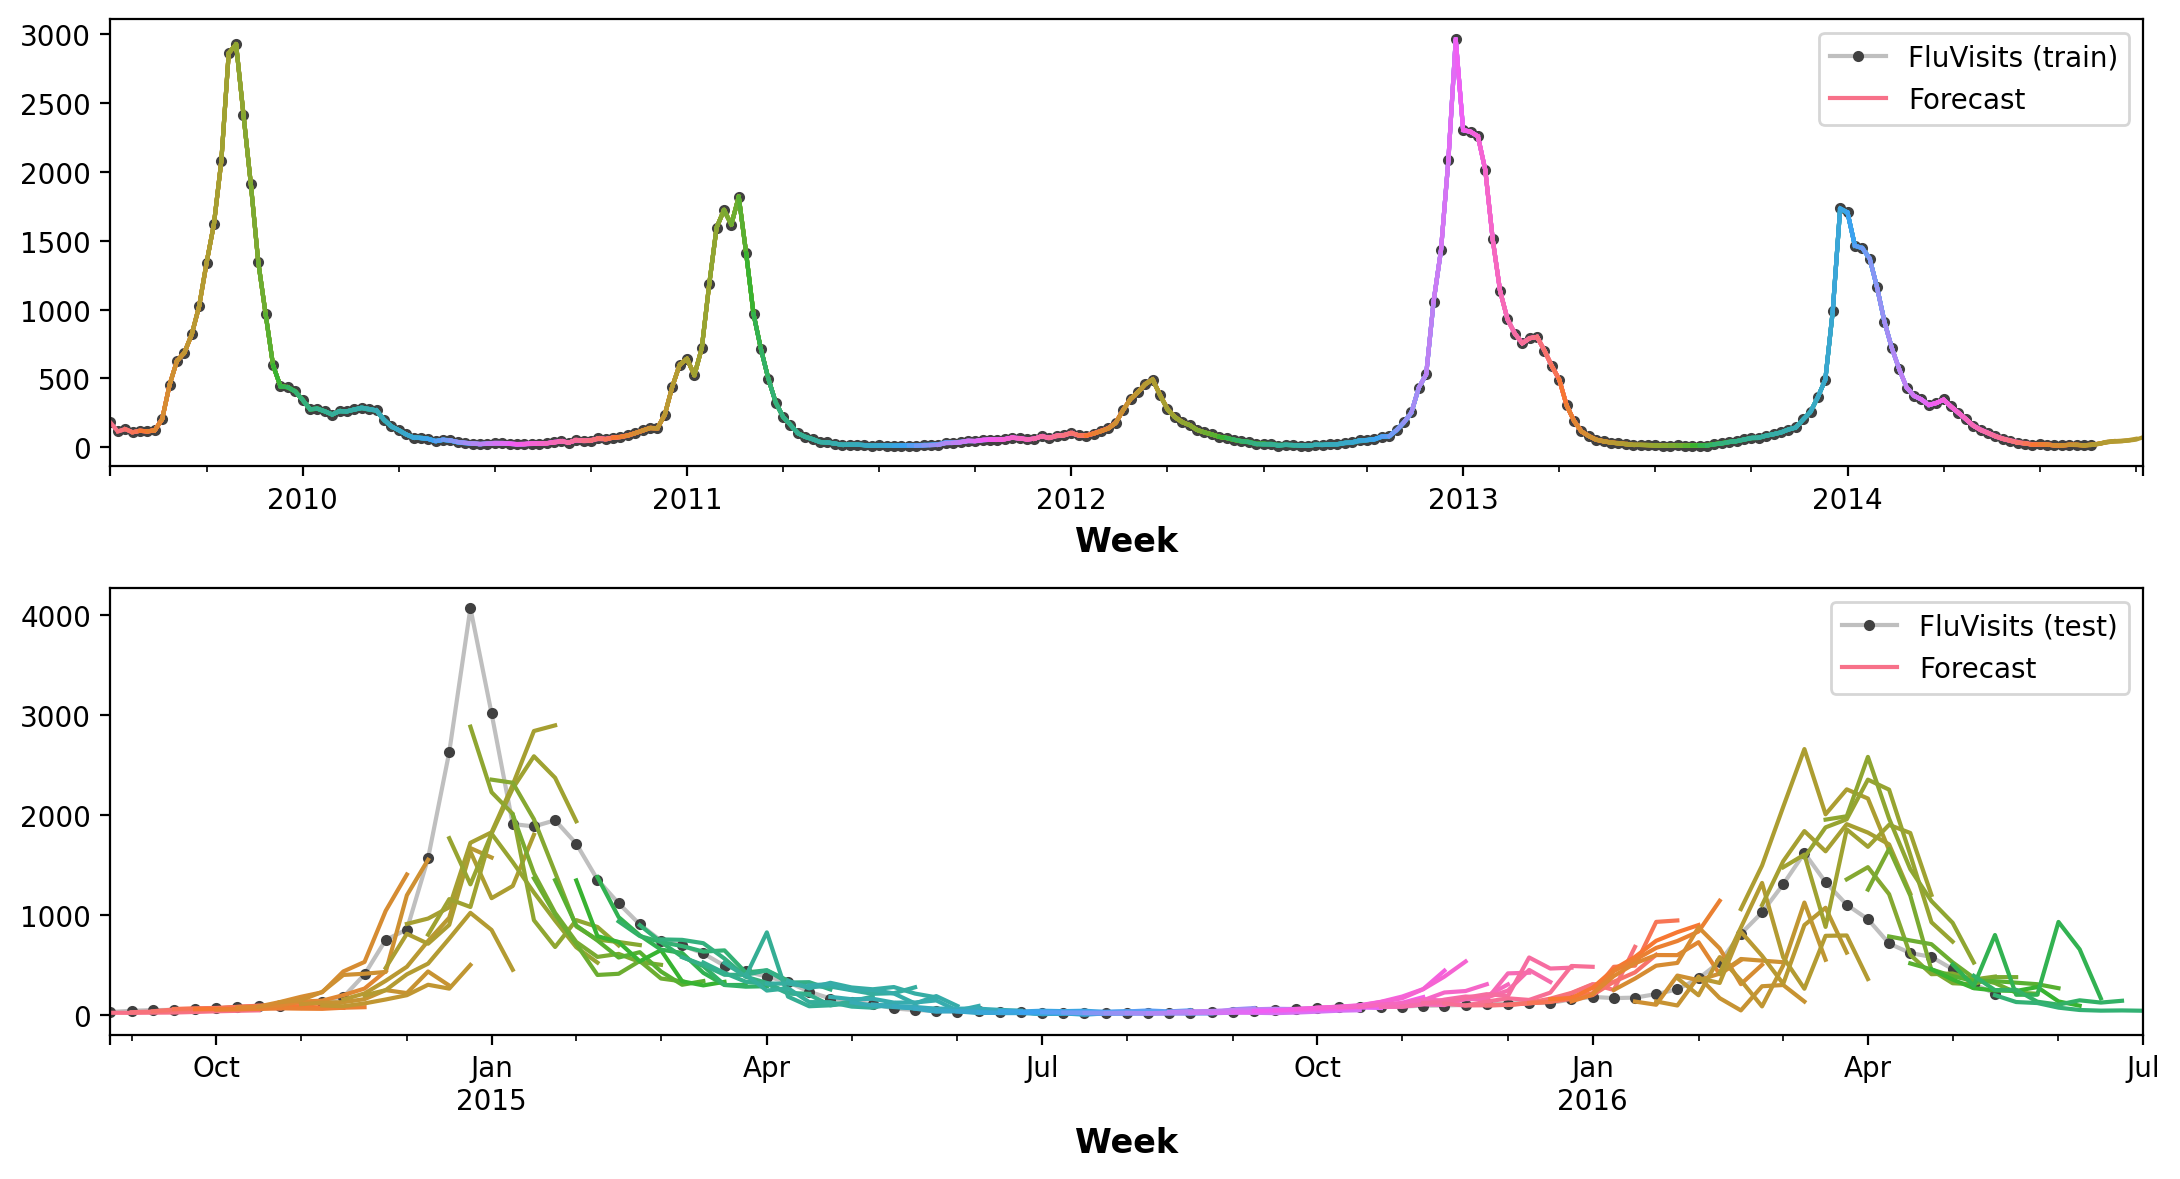

In [20]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(XGBRegressor())
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = root_mean_squared_error(y_train, y_fit)
test_rmse = root_mean_squared_error(y_test, y_pred)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = flu_trends.FluVisits[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = flu_trends.FluVisits[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

# Above is with flu, now is df_train

In [24]:
def make_lags(ts, lags, lead_time=1):
    return pd.concat(
        {
            f'y_lag_{i}': ts.shift(i)
            for i in range(lead_time, lags + lead_time)
        },
        axis=1)


# Four weeks of lag features
y = df_train.ToPredict.copy()
X = make_lags(y, lags=4).fillna(0.0)
# print("X with lag : \n", X.head())
# print("X shape : " , X.shape)
# print("y with lag : \n", y.head())
# print("y shape : " , y.shape)

def make_multistep_target(ts, steps):
    return pd.concat(
        {f'y_step_{i + 1}': ts.shift(-i)
         for i in range(steps)},
        axis=1)

# Eight-week forecast - values 8 steps AFTER
y = make_multistep_target(y, steps=8).dropna()
# print("\ny with multistep target before align : \n", y.head())
# print("y shape : " , y.shape)

# Shifting has created indexes that don't match. Only keep times for
# which we have both targets and features.
y, X = y.align(X, join='inner', axis=0)

# print("\nX with multistep target after align : \n", X.head())
# print("X with multistep target after align shape : \n", X.shape)
# print("y with multistep target after align : ", y.head())
# print("y shape : " , y.shape)


Train RMSE: 0.18
Test RMSE: 0.19


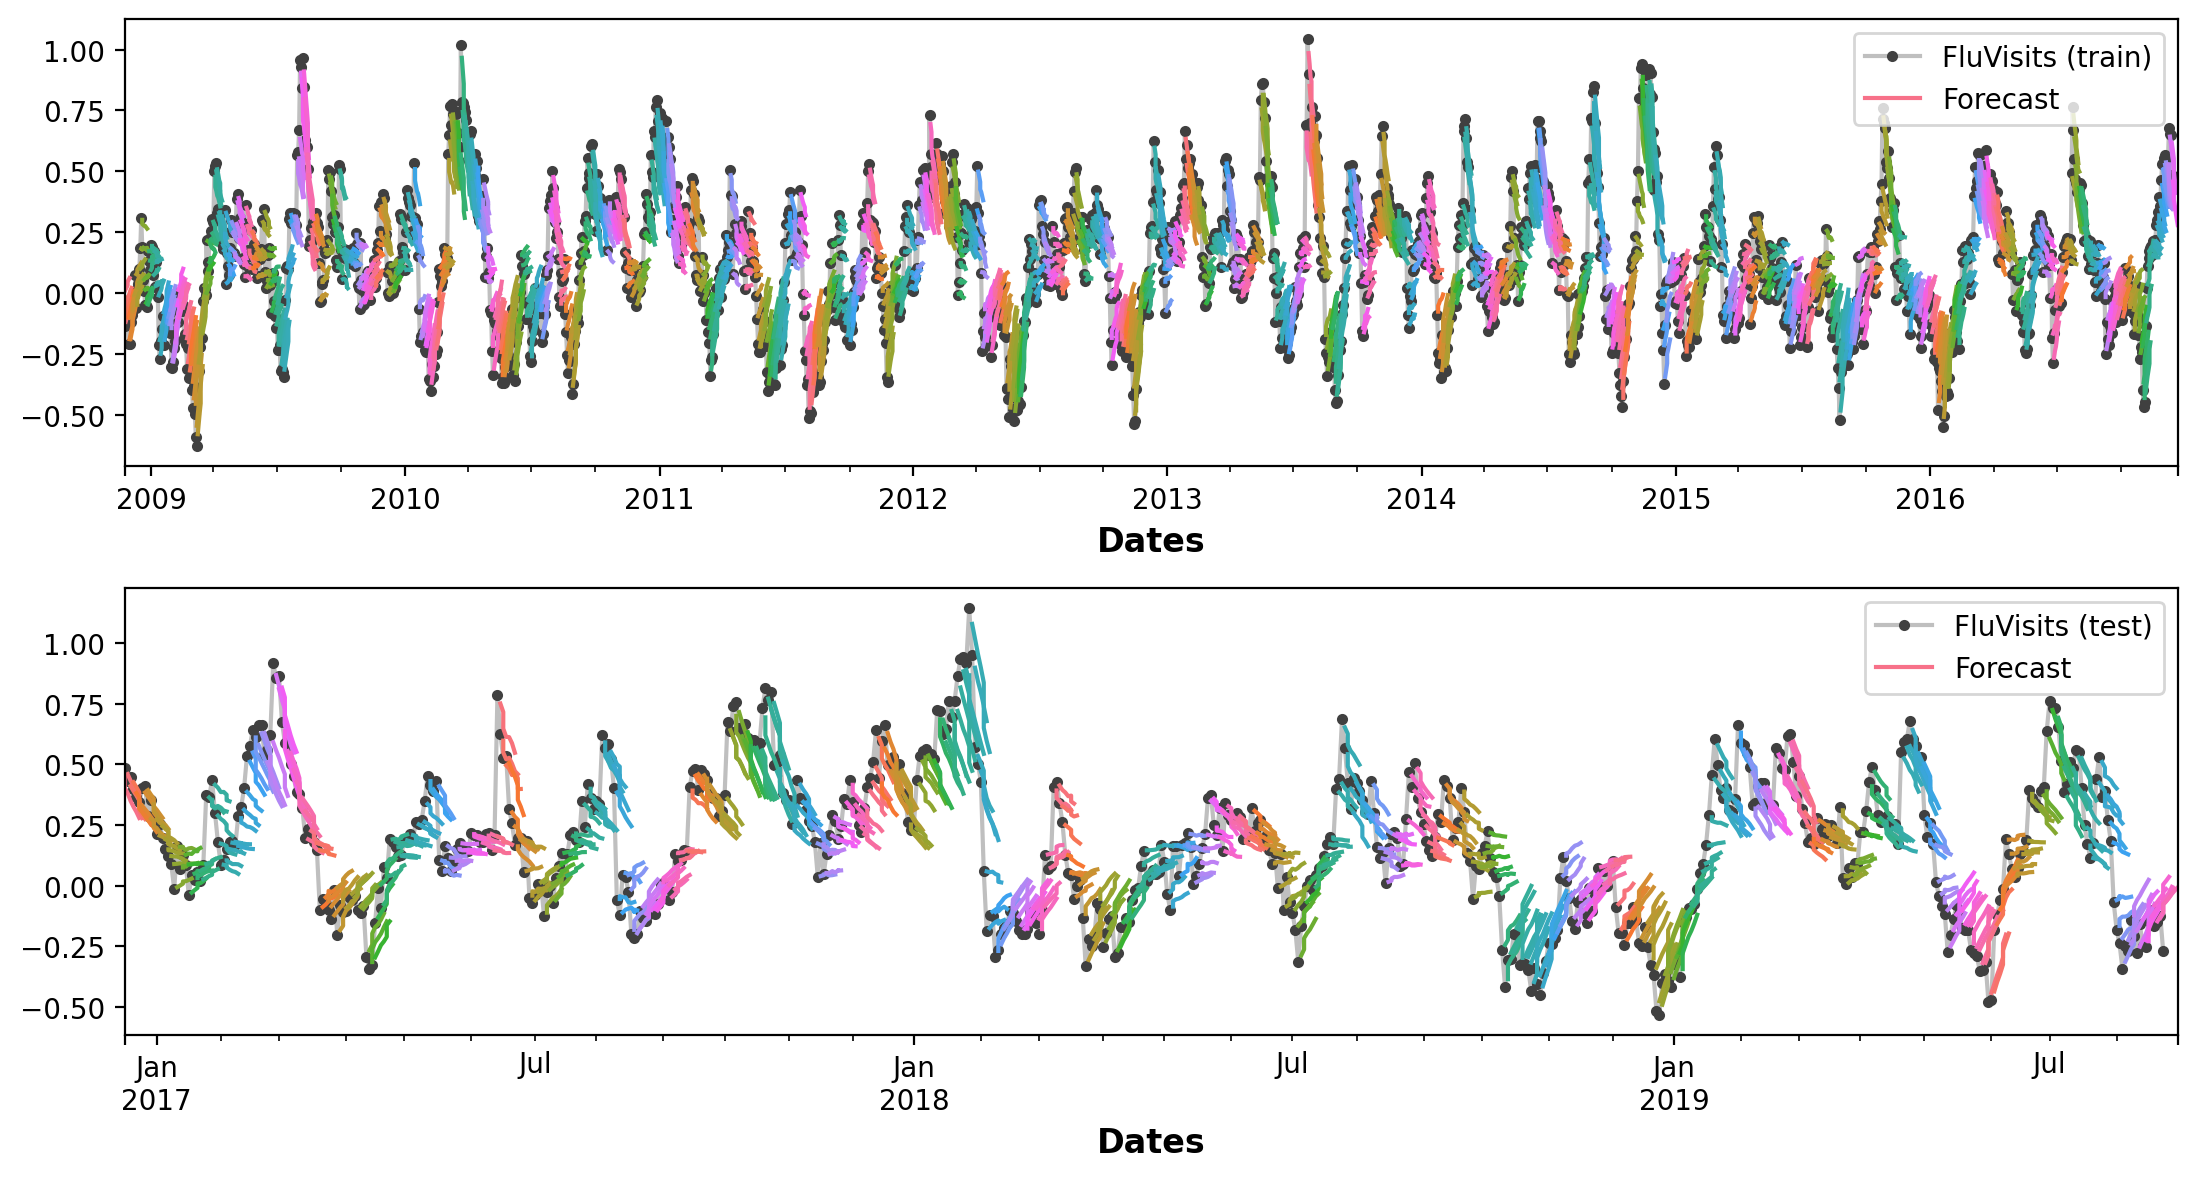

In [23]:
# Create splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)

y_fit = pd.DataFrame(model.predict(X_train), index=X_train.index, columns=y.columns)
y_pred = pd.DataFrame(model.predict(X_test), index=X_test.index, columns=y.columns)

train_rmse = root_mean_squared_error(y_train, y_fit)
test_rmse = root_mean_squared_error(y_test, y_pred)
print((f"Train RMSE: {train_rmse:.2f}\n" f"Test RMSE: {test_rmse:.2f}"))

palette = dict(palette='husl', n_colors=64)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11, 6))
ax1 = df_train.ToPredict[y_fit.index].plot(**plot_params, ax=ax1)
ax1 = plot_multistep(y_fit, ax=ax1, palette_kwargs=palette)
_ = ax1.legend(['FluVisits (train)', 'Forecast'])
ax2 = df_train.ToPredict[y_pred.index].plot(**plot_params, ax=ax2)
ax2 = plot_multistep(y_pred, ax=ax2, palette_kwargs=palette)
_ = ax2.legend(['FluVisits (test)', 'Forecast'])

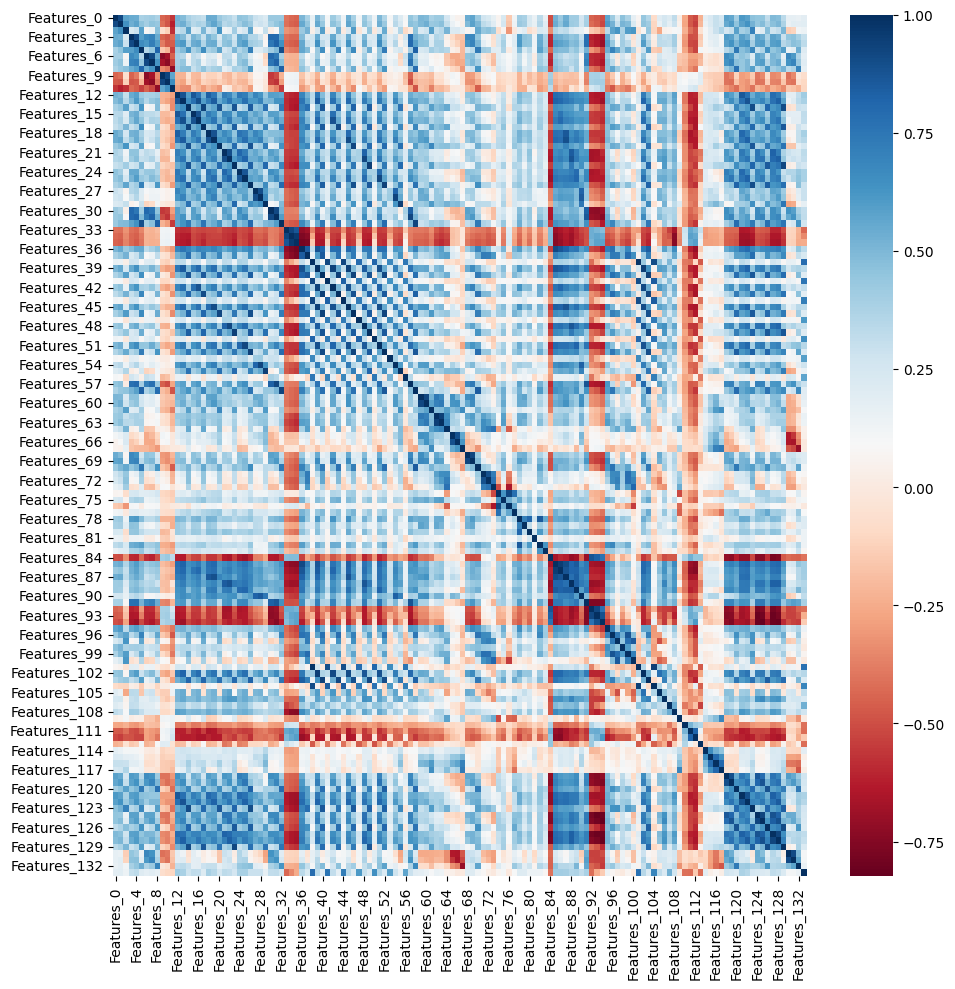

In [ ]:
plt.figure(figsize=(10, 10))
corr = df_train.drop(["Dates"], axis=1).corr()
corr_values1 = corr.round(2)
sns.heatmap(
    corr, cmap="RdBu"
)
plt.tight_layout()
plt.show()


We can see that there are a lot of highly correlated features (above 0.9 or bellow -0.9), so we can remove them because we have a lot of features already. We could later try to add them are add a dummy variable to indicate which features had a correlated one.

In [ ]:
# Calculate the correlation matrix
corr_matrix = df_train.drop(columns=['Dates']).corr().abs()

# Create a mask for correlations above 0.9 (excluding self-correlations)
# We use abs() to catch both positive and negative correlations
mask = (corr_matrix > 0.9) & (corr_matrix < 1.0)

# Find column pairs with high correlation
high_corr_pairs = []
for col in corr_matrix.columns:
    high_corr_cols = list(corr_matrix.index[mask[col]])
    for high_corr_col in high_corr_cols:
        high_corr_pairs.append((col, high_corr_col))

# Create a list of columns to drop
columns_to_drop = []
for col1, col2 in high_corr_pairs:
    # We'll keep the first column and drop the second
    if col2 not in columns_to_drop:
        columns_to_drop.append(col2)

print(f"Found {len(columns_to_drop)} columns with absolute correlation > 0.9: {columns_to_drop}")

# Remove the highly correlated columns from both train and test sets
df_train_filtered = df_train.drop(columns=columns_to_drop)
df_test_filtered = df_test.drop(columns=columns_to_drop)


df_train_filtered['Dates'] = pd.to_datetime(df_train_filtered['Dates'])
df_train_filtered = df_train_filtered.set_index('Dates').sort_index()

df_test_filtered['Dates'] = pd.to_datetime(df_test_filtered['Dates'])
df_test_filtered = df_test_filtered.set_index('Dates').sort_index()

print(f"Original shape: {df_train.shape}, New shape: {df_train_filtered.shape}")

Found 68 columns with absolute correlation > 0.9: ['Features_1', 'Features_0', 'Features_4', 'Features_3', 'Features_7', 'Features_6', 'Features_10', 'Features_9', 'Features_17', 'Features_123', 'Features_129', 'Features_14', 'Features_43', 'Features_45', 'Features_46', 'Features_48', 'Features_49', 'Features_51', 'Features_52', 'Features_54', 'Features_55', 'Features_31', 'Features_30', 'Features_57', 'Features_58', 'Features_34', 'Features_33', 'Features_35', 'Features_85', 'Features_41', 'Features_44', 'Features_101', 'Features_104', 'Features_42', 'Features_102', 'Features_103', 'Features_38', 'Features_39', 'Features_40', 'Features_19', 'Features_20', 'Features_22', 'Features_23', 'Features_25', 'Features_26', 'Features_28', 'Features_29', 'Features_32', 'Features_60', 'Features_59', 'Features_63', 'Features_62', 'Features_69', 'Features_68', 'Features_76', 'Features_74', 'Features_36', 'Features_86', 'Features_87', 'Features_93', 'Features_92', 'Features_125', 'Features_124', 'Fe

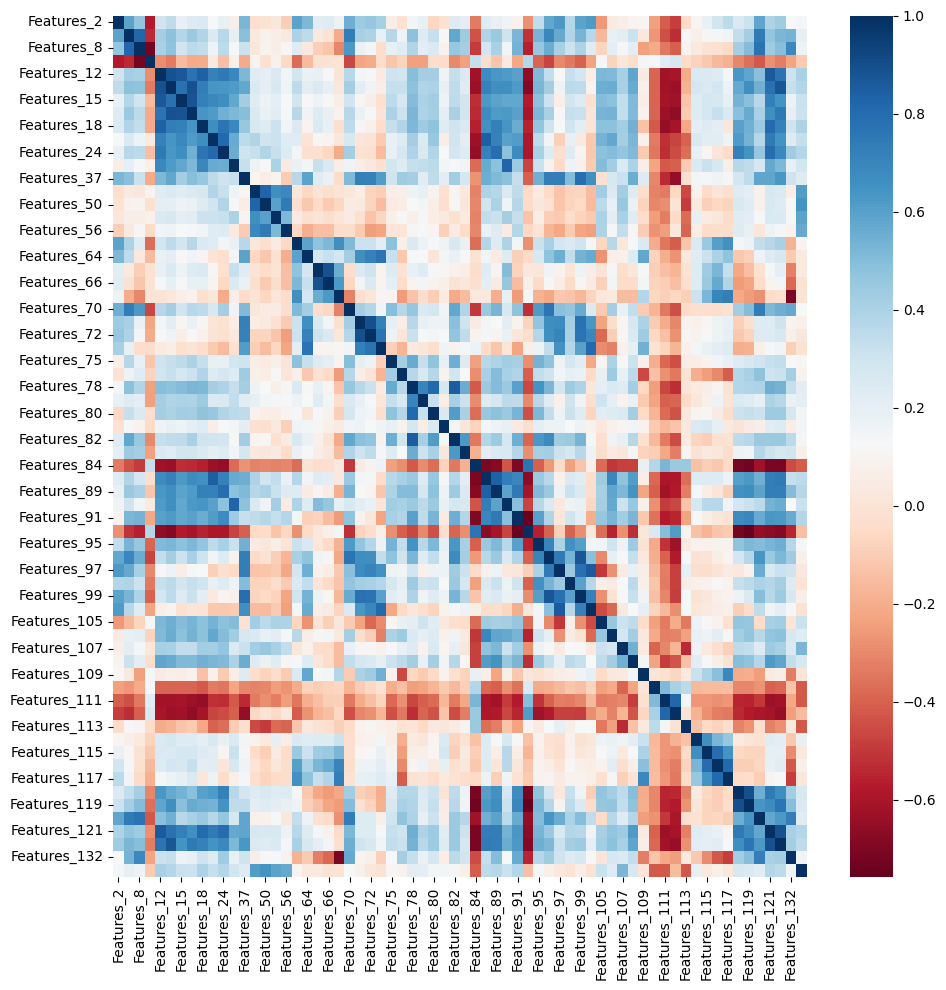

In [ ]:
plt.figure(figsize=(10, 10))
corr = df_train_filtered.drop(["Dates"], axis=1).corr()
corr_values1 = corr.round(2)
sns.heatmap(
    corr, cmap="RdBu"
)
plt.tight_layout()
plt.show()

In [19]:
df_train_filtered.head()

,Dates,Features_2,Features_5,Features_8,Features_11,Features_12,Features_13,Features_15,Features_16,Features_18,Features_21,Features_24,Features_27,Features_37,Features_47,Features_50,Features_53,Features_56,Features_61,Features_64,Features_65,Features_66,Features_67,Features_70,Features_71,Features_72,Features_73,Features_75,Features_77,Features_78,Features_79,Features_80,Features_81,Features_82,Features_83,Features_84,Features_88,Features_89,Features_90,Features_91,Features_94,Features_95,Features_96,Features_97,Features_98,Features_99,Features_100,Features_105,Features_106,Features_107,Features_108,Features_109,Features_110,Features_111,Features_112,Features_113,Features_114,Features_115,Features_116,Features_117,Features_118,Features_119,Features_120,Features_121,Features_122,Features_132,ToPredict
0,2008-11-25,-0.954643,-1.691960,-1.235825,1.181854,-1.160019,-1.401742,-1.291922,-1.507157,-1.121247,-1.043446,-0.916798,-1.199302,-0.503927,0.043853,0.084671,0.114270,0.069691,-0.8331,-1.9616,1.7067,1.5783,1.1834,-2.1023,-0.62250,-0.52250,-2.96375,-0.96445,-1.96925,-70.7,-116.9,-119.1,-27.4,-53.3,-80.6,0.81,6.0,8.91,4.48,4.23,2.525242,-0.066249,-0.165977,-0.185044,-0.032773,-0.051168,-0.000812,-0.249995,-0.310519,0.871638,0.848983,0.821741,0.56,0.8530,0.834833,0.691060,-0.639335,-0.527028,-0.493152,-0.517682,-3.809226,-4.124744,-3.667162,-1.842550,-2.196744,-1.510304,-0.132452
1,2008-11-26,-1.150851,-1.703529,-1.157047,1.033184,-1.175630,-1.350093,-1.375944,-1.514458,-1.195693,-0.980527,-0.888136,-1.022576,-0.490500,0.024080,0.064743,0.079814,0.033021,-0.8616,-1.7404,1.3336,1.1438,0.9772,-1.9182,-0.59375,-0.59000,-2.91500,-1.01775,-1.86625,-71.3,-108.4,-134.7,-29.5,-53.8,-80.2,0.80,6.0,6.93,6.73,4.37,2.546316,-0.066326,-0.167713,-0.185341,-0.030886,-0.055357,-0.001015,-0.241654,-0.287752,0.901396,0.858035,0.819608,0.70,0.8555,0.835000,0.559544,-0.569194,-0.513565,-0.485965,-0.511130,-3.797289,-4.156534,-3.727177,-1.742357,-1.987880,-1.397661,-0.060547
2,2008-11-27,-1.086524,-1.654627,-1.112181,1.114363,-0.999927,-1.196212,-1.169430,-1.300435,-0.939185,-1.044248,-0.908167,-1.090234,-0.454210,-0.046271,-0.008089,-0.024196,0.012378,-1.1109,-2.0414,1.2773,1.0513,0.8075,-1.9774,-0.61063,-0.60688,-2.87625,-1.08985,-1.85025,-76.9,-119.9,-146.6,-33.1,-54.6,-79.7,0.80,6.0,6.93,6.28,6.39,2.564370,-0.071689,-0.174465,-0.189929,-0.037012,-0.060808,-0.008104,-0.194838,-0.262870,0.947105,0.869452,0.817996,0.64,0.8580,0.834333,0.498508,-0.511239,-0.501563,-0.478590,-0.505832,-3.693647,-4.091138,-3.685695,-1.601700,-1.852086,-1.362996,-0.107772
3,2008-11-28,-1.041002,-1.589089,-1.071208,1.052606,-1.020624,-1.205257,-1.188691,-1.305012,-0.968346,-0.921357,-0.797636,-1.009518,-0.453345,-0.035942,-0.006956,-0.074853,-0.061985,-1.2233,-2.1408,1.2905,0.9412,0.7331,-2.0152,-0.58563,-0.57375,-2.78813,-1.11110,-1.87320,-74.3,-118.8,-144.7,-32.9,-50.8,-79.3,0.80,4.0,7.92,6.73,7.06,2.578635,-0.066561,-0.174337,-0.188445,-0.034297,-0.061162,-0.007817,-0.197857,-0.265356,0.947105,0.869452,0.817996,0.64,0.8555,0.832167,0.498154,-0.503923,-0.499807,-0.478788,-0.506797,-3.727047,-4.039119,-3.685119,-1.582702,-1.883213,-1.349401,-0.115605
4,2008-12-01,-1.074366,-1.662095,-1.098122,1.049993,-0.960031,-1.220311,-1.173212,-1.374537,-0.953792,-0.851197,-0.698148,-0.980916,-0.442903,-0.061104,-0.019700,0.002224,-0.075279,-1.3140,-2.3269,1.0412,0.8006,0.6451,-2.0073,-0.57375,-0.59687,-2.74937,-1.23618,-1.86068,-74.2,-117.6,-143.4,-34.4,-50.9,-78.8,0.80,4.0,10.89,6.28,7.56,2.592521,-0.062393,-0.175049,-0.187513,-0.030564,-0.061781,-0.010444,-0.201183,-0.248557,0.938947,0.869452,0.817996,0.70,0.8530,0.830667,0.439513,-0.518072,-0.497170,-0.477396,-0.506488,-3.649243,-3.997265,-3.624878,-1.666403,-1.959641,-1.307821,-0.209367
